## Importing Libraries and Data Cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [3]:
df=pd.read_csv("C:/Users/nithi/Downloads/Crop_Production_Statistics.csv/Crop_Production_Statistics.csv")
df.head()

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415.0,1.40
1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277.0,1.40
2,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060.0,0.74
3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120.0,0.75


In [4]:
df.shape

(345336, 8)

In [5]:
for i in df.columns:
    print(i)
    print(df[i].isna().sum())

State
0
District 
0
Crop
9
Crop_Year
0
Season
0
Area 
0
Production
4948
Yield
0


In [6]:
df.columns

Index(['State', 'District ', 'Crop', 'Crop_Year', 'Season', 'Area ',
       'Production', 'Yield'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345336 entries, 0 to 345335
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   State       345336 non-null  object 
 1   District    345336 non-null  object 
 2   Crop        345327 non-null  object 
 3   Crop_Year   345336 non-null  int64  
 4   Season      345336 non-null  object 
 5   Area        345336 non-null  float64
 6   Production  340388 non-null  float64
 7   Yield       345336 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 21.1+ MB


In [8]:
df['Season'].value_counts().index

Index(['Kharif     ', 'Rabi       ', 'Whole Year ', 'Summer     ',
       'Winter     ', 'Autumn     '],
      dtype='object', name='Season')

In [9]:
df['Season'].value_counts()

Season
Kharif         138369
Rabi           100951
Whole Year      68680
Summer          22098
Winter           8249
Autumn           6989
Name: count, dtype: int64

In [10]:
r=df[df['Crop'].isna()]
r

,State,District,Crop,Crop_Year,Season,Area,Production,Yield
273741,Tamil Nadu,COIMBATORE,NaN,1998,Rabi,20.0,1.0,0.05
273742,Tamil Nadu,DINDIGUL,NaN,2002,Rabi,1.0,0.0,0.00
273743,Tamil Nadu,KRISHNAGIRI,NaN,2004,Rabi,1.0,NaN,0.00
273744,Tamil Nadu,NAMAKKAL,NaN,1998,Rabi,250.0,13.0,0.05
273745,Tamil Nadu,RAMANATHAPURAM,NaN,2006,Rabi,3.0,NaN,0.00
273746,Tamil Nadu,SALEM,NaN,1999,Rabi,25.0,12.0,0.48
273747,Tamil Nadu,THE NILGIRIS,NaN,1998,Rabi,430.0,20.0,0.05
273748,Tamil Nadu,TIRUPPUR,NaN,2011,Kharif,2.0,NaN,0.00
273749,Tamil Nadu,VELLORE,NaN,2006,Rabi,4.0,NaN,0.00


In [11]:
nv={}
for i,(dist,yea,Sea) in enumerate(zip(r['District '],r['Crop_Year'],r['Season'])):
    t=df[(((df['District ']==dist)&(df['Crop_Year']==yea))&(df['Season']==Sea))]['Crop'].value_counts().index
    if len(t)==0:
        nv[dist]=np.nan
    else:
        nv[dist]=t[-1]
nv
        
    

{'COIMBATORE': 'Gram',
 'DINDIGUL': 'Gram',
 'KRISHNAGIRI': 'Rapeseed &Mustard',
 'NAMAKKAL': 'Gram',
 'RAMANATHAPURAM': nan,
 'SALEM': 'Rapeseed &Mustard',
 'THE NILGIRIS': nan,
 'TIRUPPUR': 'Rice',
 'VELLORE': nan}

In [12]:
df.loc[:, 'Crop'] = df['Crop'].fillna(df['District '].map(nv))
df.dropna(subset=['Crop'],axis=0,inplace=True)

In [13]:
df['Crop'].isna().sum()

0

In [14]:
season_mapping = {'Rabi       ': 'Spring','Kharif     ':"Rainy",'Whole Year ':'Whole Year','Summer     ':'Summer','Winter     ':'Winter','Autumn     ':'Autumn'}
df['Season'] = df['Season'].map(season_mapping).fillna(df['Season'])


In [15]:
df.dropna(subset=['Production'],axis=0,inplace=True)

In [16]:
df['Production'].isna().sum()

0

In [17]:
for i in df.columns:
    print(i)
    print(df[i].isna().sum())

State
0
District 
0
Crop
0
Crop_Year
0
Season
0
Area 
0
Production
0
Yield
0


In [18]:
df.shape

(340387, 8)

##Visualization

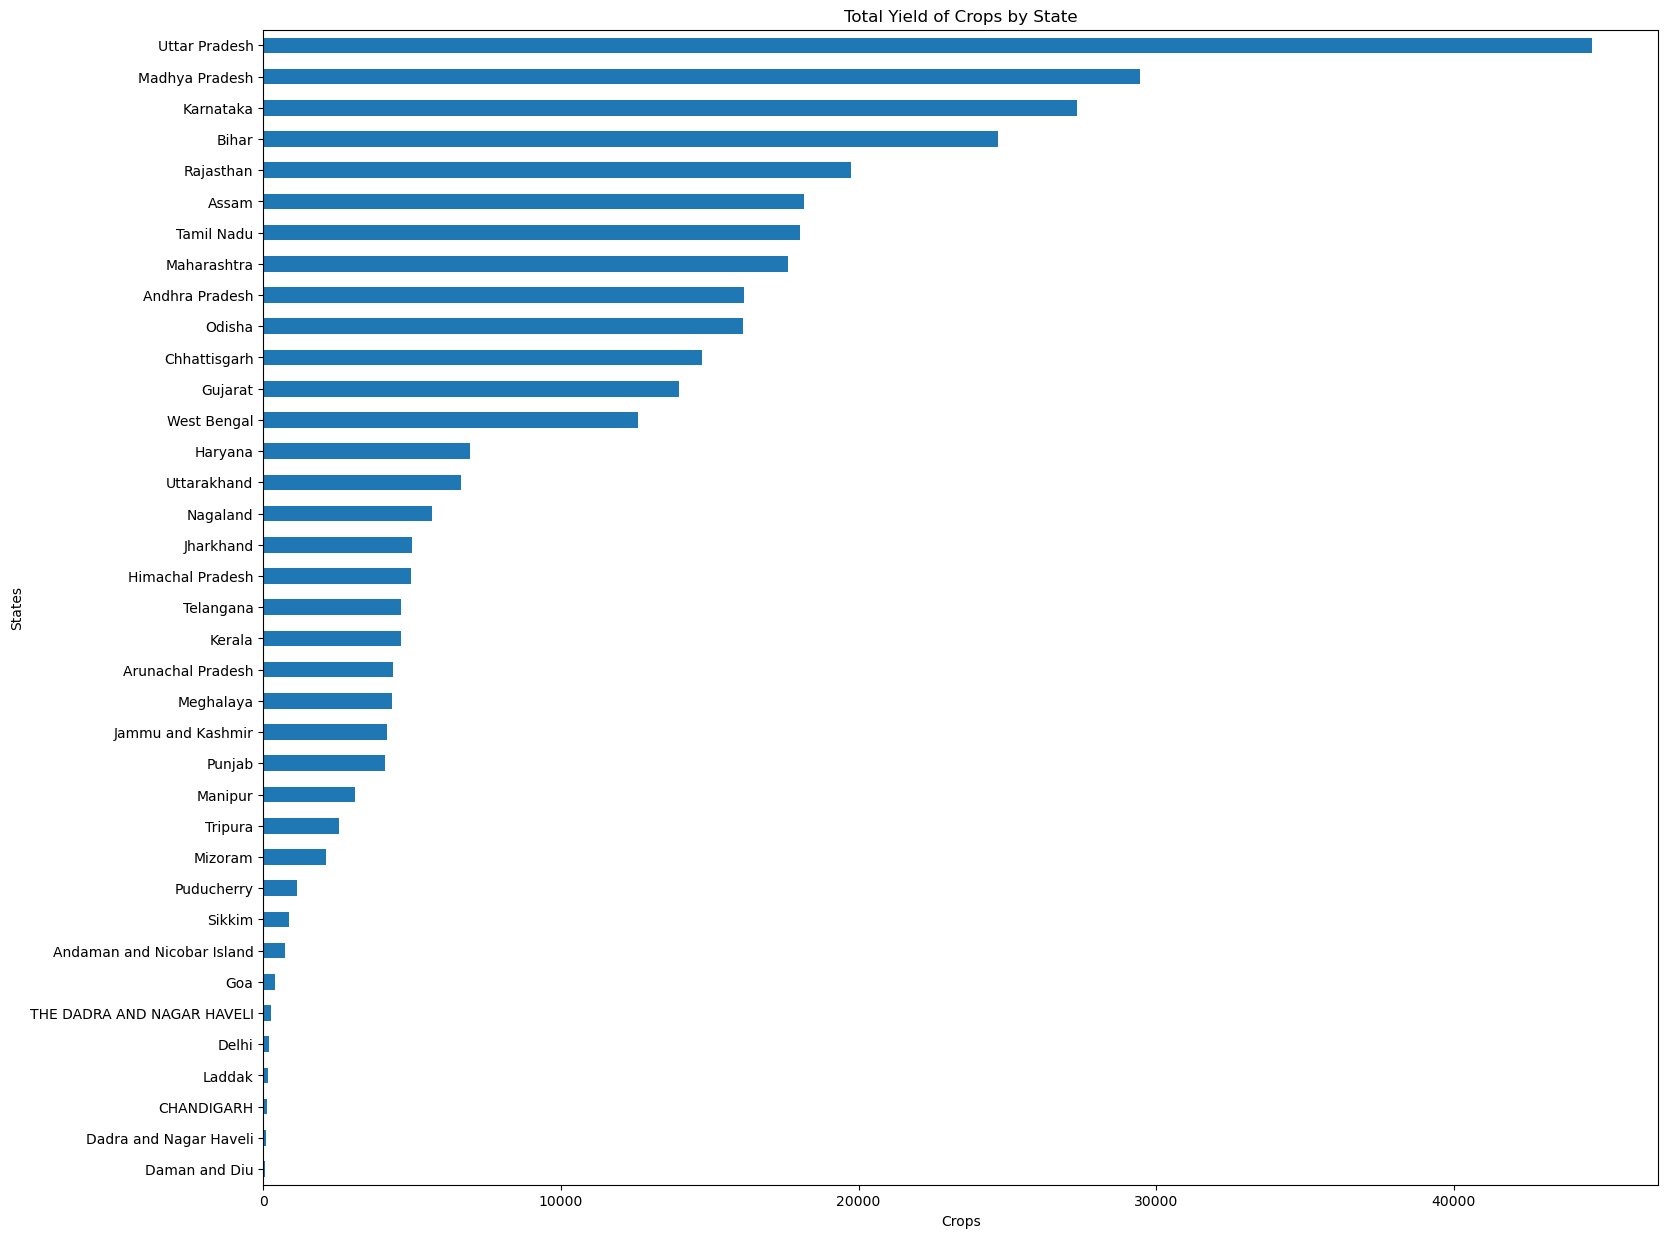

In [19]:
state_totals = df.groupby('State')['Crop'].count().sort_values()
plt.figure(figsize=(18, 15))
state_totals.plot(kind='barh')
plt.xlabel("Crops")
plt.ylabel("States")
plt.title("Total Yield of Crops by State")
plt.show()


In [20]:
df.groupby('State')['Crop'].count().sort_values(ascending=False).head(10)

State
Uttar Pradesh     44635
Madhya Pradesh    29455
Karnataka         27322
Bihar             24686
Rajasthan         19743
Assam             18179
Tamil Nadu        18044
Maharashtra       17615
Andhra Pradesh    16162
Odisha            16101
Name: Crop, dtype: int64

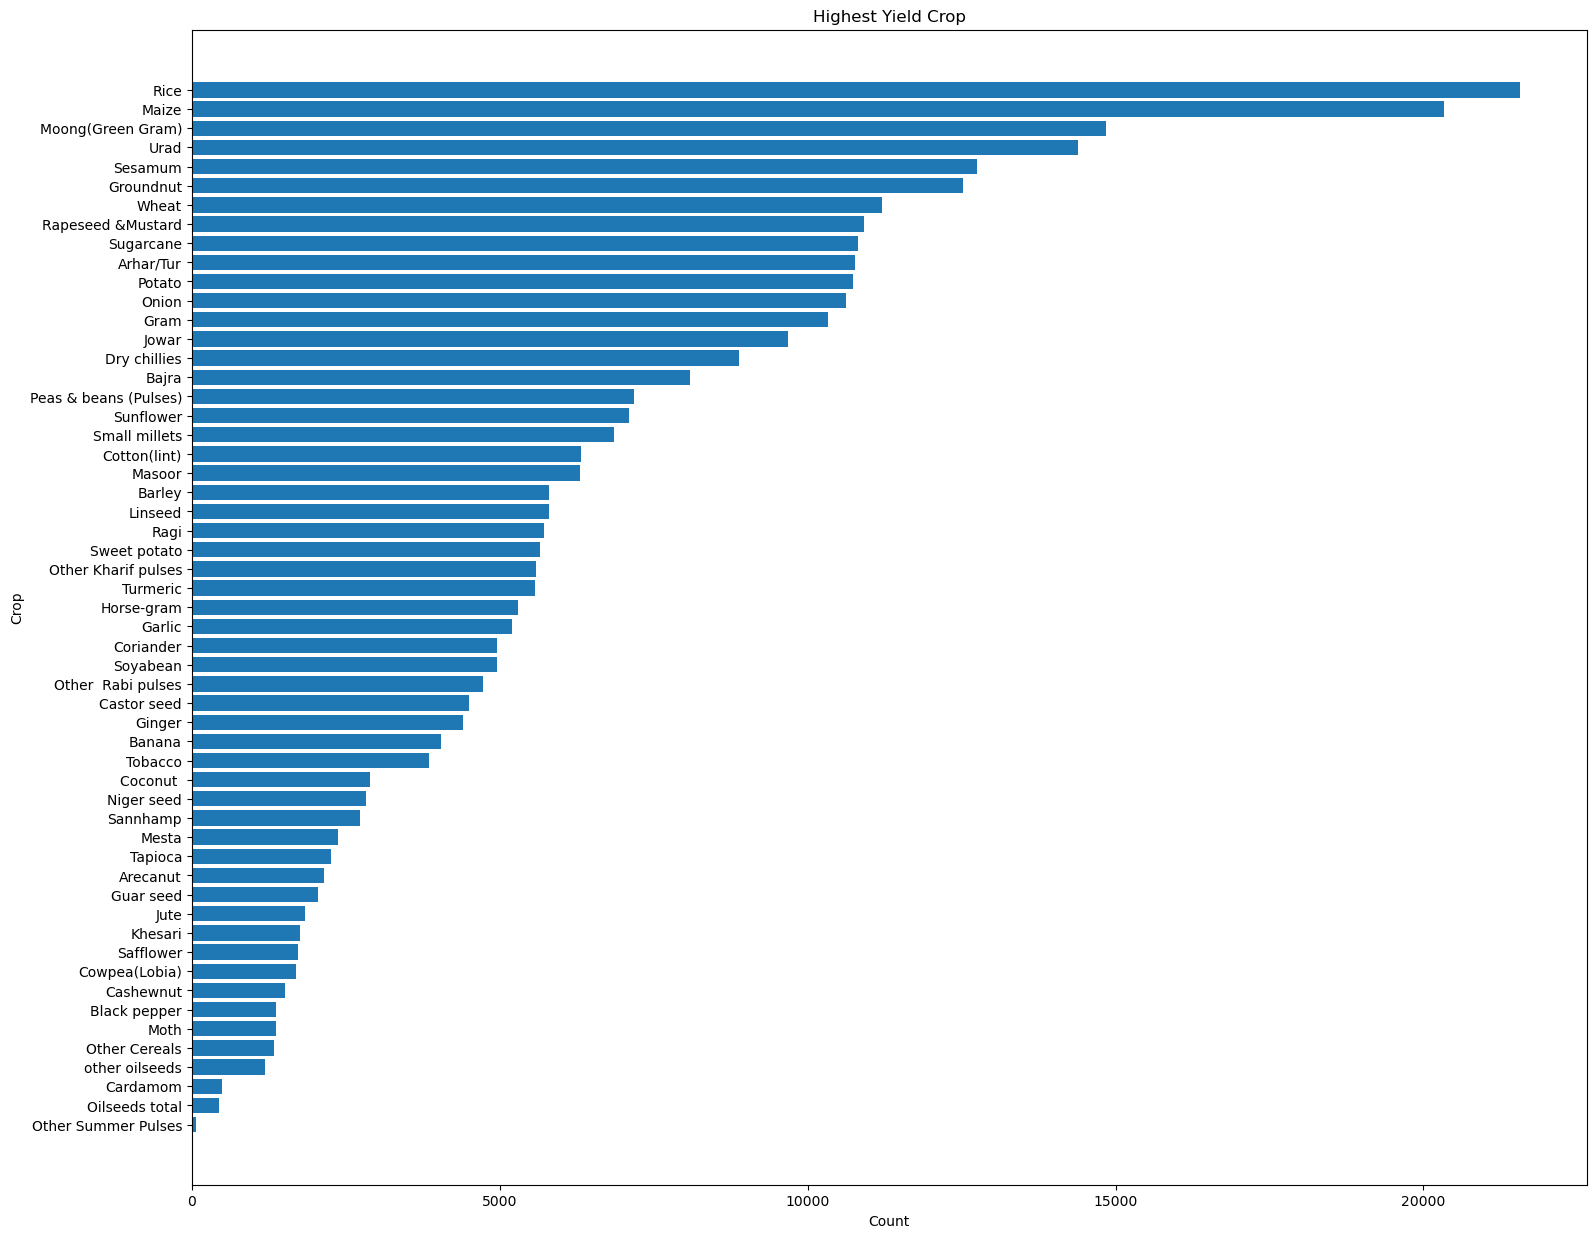

In [21]:
inn=df['Crop'].value_counts().sort_values()
plt.figure(figsize=(18,15))
plt.xlabel("Count")
plt.ylabel("Crop")
plt.title("Highest Yield Crop")
plt.barh(inn.index,inn.values)
plt.show()

In [22]:
df['Crop'].value_counts().sort_values(ascending=False).head(10)

Crop
Rice                 21573
Maize                20335
Moong(Green Gram)    14851
Urad                 14389
Sesamum              12744
Groundnut            12515
Wheat                11208
Rapeseed &Mustard    10920
Sugarcane            10826
Arhar/Tur            10764
Name: count, dtype: int64

In [23]:
df['State'].unique()

array(['Andaman and Nicobar Island', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'CHANDIGARH',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Daman and Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Laddak',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'THE DADRA AND NAGAR HAVELI',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

##Finding Correlation


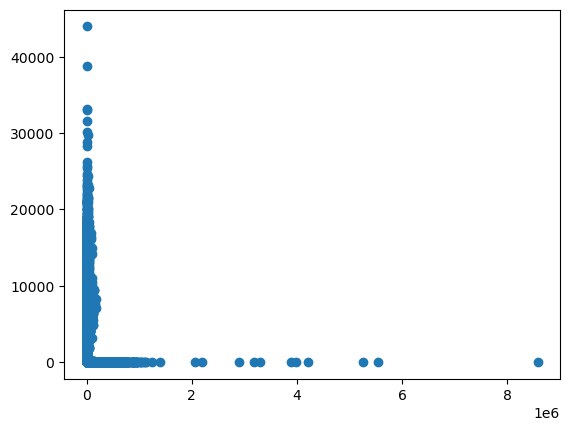

In [68]:
plt.scatter(df['Area '],df['Yield'])

In [52]:
dp={}
for season in df['Season'].unique():
    crop_counts = df[df['Season'] == season]['Crop'].value_counts().sum()
    dp[season]=crop_counts
print(dp)


{'Rainy': 136149, 'Spring': 99797, 'Autumn': 6967, 'Summer': 21971, 'Whole Year': 67265, 'Winter': 8238}


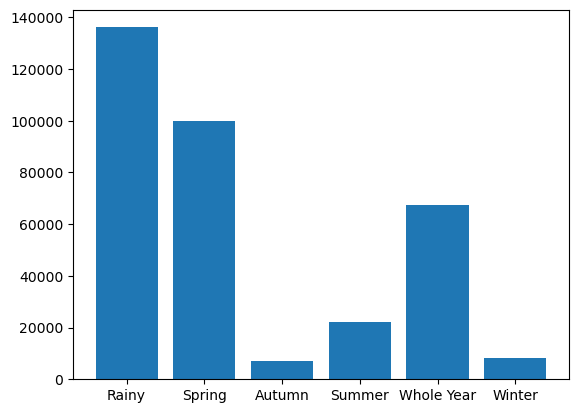

In [57]:
cat= list(dp.keys())
cou= list(dp.values())
plt.bar(cat, cou)
plt.show()

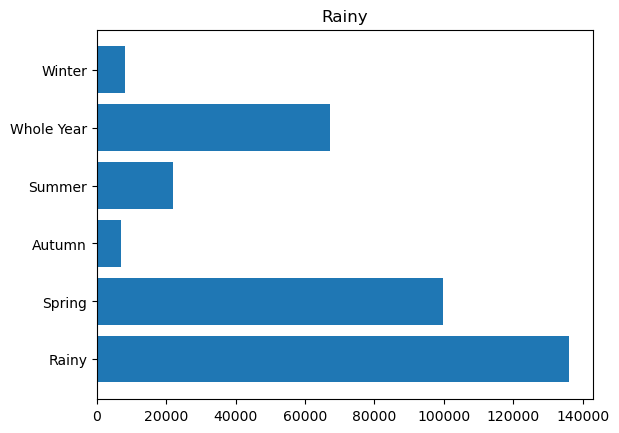

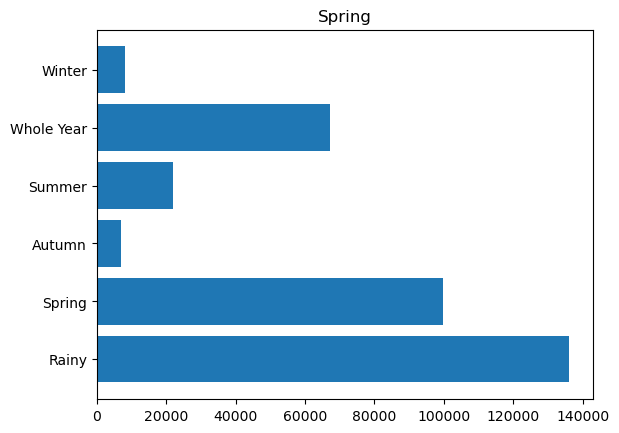

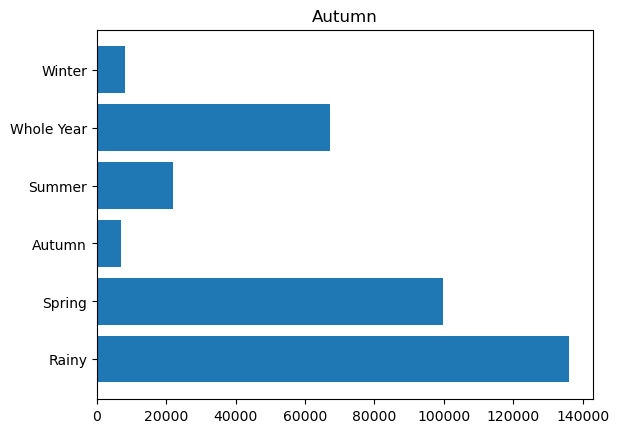

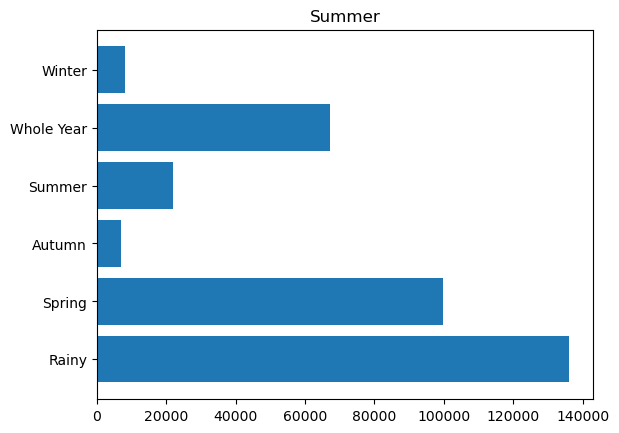

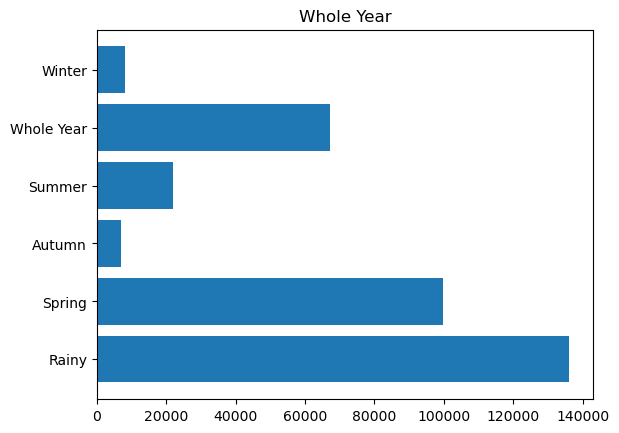

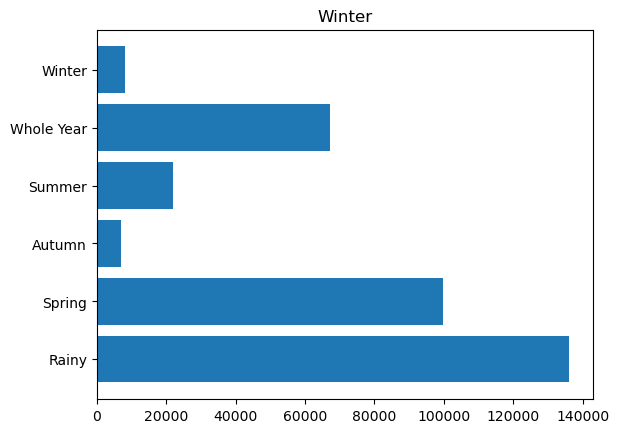

In [65]:
yt={}
for i in df['Season'].unique():
    yu=df[df['Season'] == season]['Crop'].value_counts()
    yt[i]=yu
    plt.title(i)
    oat= list(dp.keys())
    oou= list(dp.values())
    plt.barh(oat,oou)
    plt.show()
    

## Model Building


In [23]:
X = df[['State', 'District ', 'Crop', 'Crop_Year', 'Season', 'Area ', 'Production']]
y = df['Yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest


In [24]:

categorical_features = ['State', 'District ', 'Crop', 'Season']
numeric_features = ['Crop_Year', 'Area ', 'Production']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("RMSE",np.sqrt(mse))


Mean Squared Error: 163770.61036938758
RMSE 404.6858168621524


In [25]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


R-squared: 0.7977772313460978


In [26]:
X = df[['Area ', 'Production']]
y = df['Yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Xg Booster

In [27]:
X = df[['Area ', 'Production']]
y = df['Yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
xgb_regressor = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_regressor.fit(X_train_scaled, y_train)
y_pred = xgb_regressor.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
rmse = mse ** 0.5
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 101963.16271918746
Root Mean Squared Error: 319.3167122453622


In [28]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


R-squared: 0.874096621980737


In [49]:
X = df[['Area ', 'Production']]
y = df['Yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
rw_model = RandomForestRegressor(n_estimators=100, random_state=42)
rw_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest RMSE:", rmse_rf)


C:\Users\nithi\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Random Forest Mean Squared Error: 810177.8520951791
Random Forest RMSE: 900.0988012963794


In [30]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.874096621980737


Random Forest:
RMSE: 64.4233163255378
Accuracy: 0.9948751608503663

XGBoost:
RMSE: 307.2987087497925
Accuracy: 0.8833954344452173


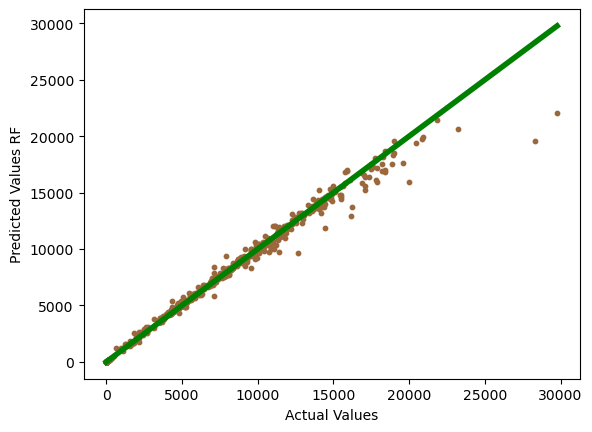

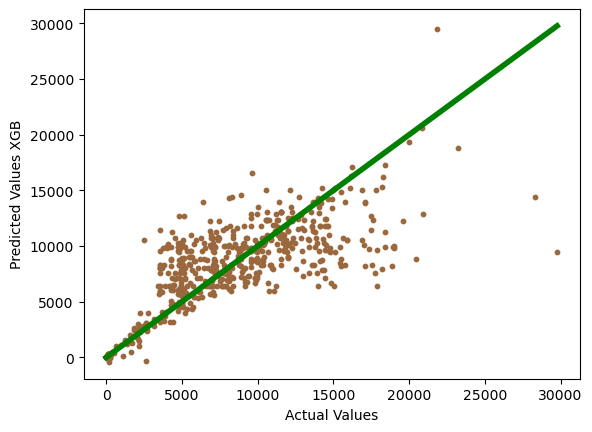

In [31]:
X = df[['Area ', 'Production']]
y = df['Yield']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
accuracy_rf = rf_model.score(X_test, y_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
accuracy_xgb = xgb_model.score(X_test, y_test)
print("Random Forest:")
print(f"RMSE: {rmse_rf}")
print(f"Accuracy: {accuracy_rf}")
print("\nXGBoost:")
print(f"RMSE: {rmse_xgb}")
print(f"Accuracy: {accuracy_xgb}")
plt.scatter(y_test, y_pred_rf, s=10, color='#9B673C')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values RF')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth=4)
plt.show()
plt.scatter(y_test, y_pred_xgb, s=10, color='#9B673C')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values XGB')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='green', linewidth=4)
plt.show()



In [32]:
df.columns

Index(['State', 'District ', 'Crop', 'Crop_Year', 'Season', 'Area ',
       'Production', 'Yield'],
      dtype='object')

In [ ]:
## Converting model to pickle File

In [51]:
import pickle
file_path = 'C:/Users/nithi/Downloads/yield.pkl'
with open(file_path, 'wb') as f:
    pickle.dump(xgb_regressor, f)